In [1]:
import torch
import pickle
from tqdm import tqdm

class Experiment:
    def __init__(self, model, criterion, optimizer, device='cpu'):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device

        self.loss = []
        self.epoch_loss = []

        self.loss_loaded = False
        self.weights_loaded = False

    def train(self, train_loader, epochs=10):
        N = len(train_loader)
        for epoch in range(1, epochs + 1):
            self.model.train()
            epoch_loss = 0
            with tqdm(enumerate(train_loader), total=N / train_loader.batch_size, desc=f'Epoch {epoch}/{epochs}', unit='batch') as pbar:
                for i, data in pbar:
                    images, labels = data

                    images = images.to(self.device)
                    labels = labels.to(self.device)

                    pred = self.model(images)

                    loss = self.criterion(pred, labels)

                    self.optimizer.zero_grad()
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)

                    epoch_loss += loss.item()
                    pbar.set_postfix(loss = loss.item())

            print(f'{epoch}/{epochs} loss: {epoch_loss / N}')
            self.epoch_loss.append(epoch_loss / N)
            epoch_loss = 0
        
        self.loss_loaded = True
        self.weights_loaded = True
        print("Training Complete")

    def save_weights(self, file_name):
        assert self.weights_loaded
        assert file_name.ends_with(".pth")

        torch.save(self.model.state_dict(), file_name)

    def save_loss(self, file_name):
        assert self.loss_loaded
        assert file_name.ends_with(".pkl")

        loss_dict = dict(loss=self.loss, epoch_loss=self.epoch_loss)

        with open(file_name, 'wb') as f:
            pickle.dump(loss_dict, f)

    def plot_loss():
        pass

    def load_model(self, file_name):
        pass

In [2]:
from GvaDataset import GvaDataset
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms 

transform = transforms.Compose([
    transforms.Resize((1024, 512))
])

images_path = "data/images/"
labels_path = "data/labels"
dataset = GvaDataset(images_path, labels_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

In [3]:
x = torch.tensor([2, 2, 1])
x[x == 2] = 0
print(x)


tensor([0, 0, 1])


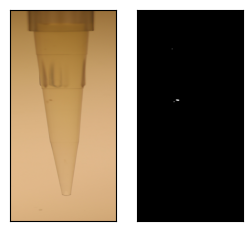

In [7]:
import matplotlib.pyplot as plt


img, lab = dataset[4]

lab = lab.squeeze(0)

fig, ax = plt.subplots(1, 2, figsize=(3, 10))
ax[0].imshow(img.permute(1, 2, 0))
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].imshow(lab, cmap="gray")

In [5]:
from models.unet import UNet
import torch.optim as optim
import torch.nn as nn

device = 'cpu'
model = UNet(in_channels=3, out_channels=1)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()
experiment = Experiment(model, criterion, optimizer, device)

In [8]:
img, lab = dataset[4]
print(torch.sum(lab == 0))
print(torch.sum(lab == 1))
print(torch.sum(lab == 2))
print(torch.sum(lab == 3))


tensor(524180)
tensor(108)
tensor(0)
tensor(0)


In [9]:
experiment.train(train_loader=train_loader, epochs=10)

Epoch 1/10:  20%|██        | 1/5.0 [00:15<01:02, 15.68s/batch, loss=0.631]

0.6313461065292358


Epoch 1/10:  40%|████      | 2/5.0 [00:30<00:46, 15.33s/batch, loss=0.629]

0.6286758184432983


Epoch 1/10:  60%|██████    | 3/5.0 [00:46<00:30, 15.47s/batch, loss=0.632]

0.6316350698471069


Epoch 1/10:  60%|██████    | 3/5.0 [01:04<00:42, 21.44s/batch, loss=0.632]


KeyboardInterrupt: 